# ISTAによるスパース信号再現 (デモ)

Copyright (c) 2022 Tadashi Wadayama  
Released under the MIT license  
https://opensource.org/licenses/mit-license.php

In [1]:
using LinearAlgebra
using Plots
gr()
using Flux

## グローバル定数の設定

In [2]:
n = 256
m = 128
σ = 0.1
p = 0.1

A = randn(m, n)
γ_opt = 1.0/maximum(eigvals(A'*A))

0.001344542005180837

## スパースベクトル生成関数

ベルヌーイ・ガウス分布に従うスパースベクトルを生成する。

In [3]:
function mini_batch(K)
    seq = randn(n,K)
    support = zeros(n, K)
    for i in 1:n
        for j in 1:K
            if rand() < p
                support[i,j] = 1
            end
        end
    end
    x = seq .* support
    y = A*x + σ*randn(m,K)
    return y, x
end

mini_batch (generic function with 1 method)

In [4]:
_,x = mini_batch(1)
size(x)

(256, 1)

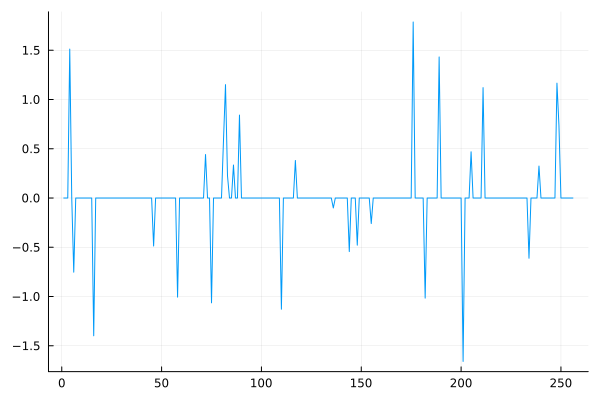

In [5]:
plot(1:n, x, legend=false)

## ソフトしきい値関数

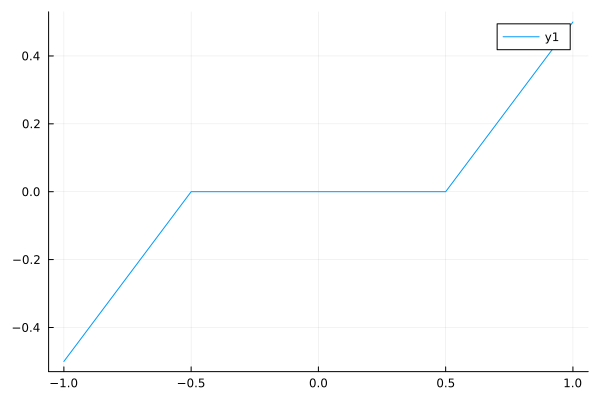

In [6]:
x = -1.0:0.1:1.0
plot(x, softshrink.(x, 0.5))

## スパース信号の生成

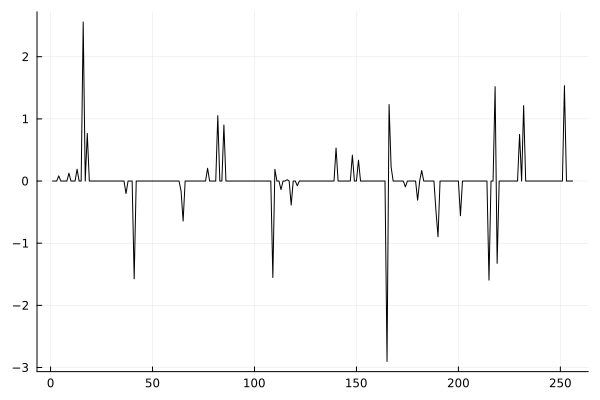

In [7]:
y, x = mini_batch(1)
plot(1:n, x, linewidth=1, label="x", color=:black, legend=false)

## ISTA

In [8]:
S(x,τ) = sign(x)*max(abs(x)-τ,0)

function ISTA(y, max_itr)
    x = zeros(n, 1)
    for i in 0:max_itr-1
        x = x - γ_opt * A'*(A*x - y)
        x = S.(x, γ_opt)
    end
    return x
end

ISTA (generic function with 1 method)

## ISTAの実行

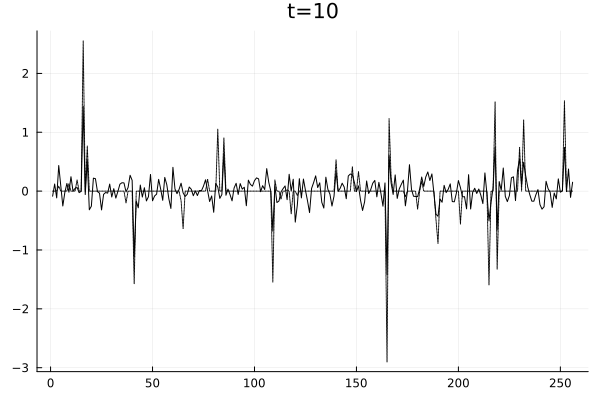

In [9]:
t = 10
z = ISTA(y, t);
p1 = plot(1:n,x, linewidth=1, label="Original", title="t="*string(t),color=:black, ls=:dot, legend=false)
plot!(1:n,z, linewidth=1, label="Estimated",color=:black)

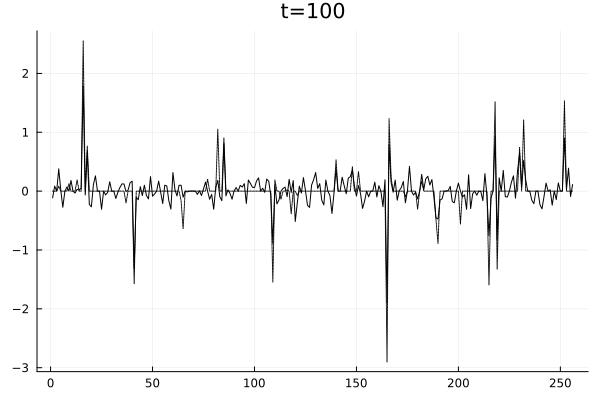

In [10]:
t = 100
z = ISTA(y, t);
p2 = plot(1:n,x, linewidth=1, label="Original", title="t="*string(t),color=:black, ls=:dot, legend=false)
plot!(1:n,z, linewidth=1, label="Estimated",color=:black)

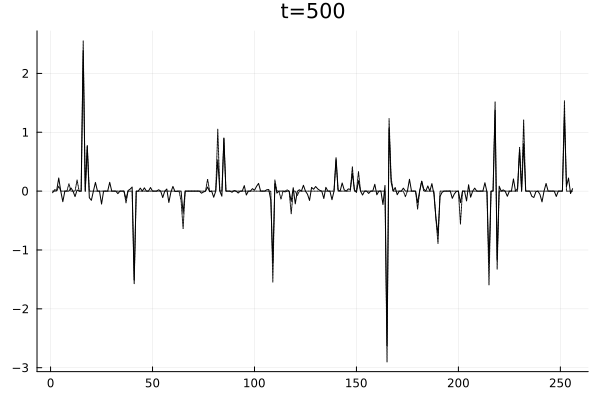

In [11]:
t = 500
z = ISTA(y, t);
p3 = plot(1:n,x, linewidth=1, label="Original", title="t="*string(t),color=:black, ls=:dot, legend=false)
plot!(1:n,z, linewidth=1, label="Estimated",color=:black)

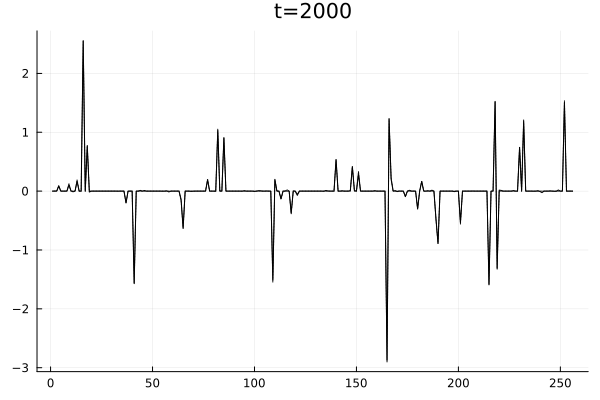

In [12]:
t = 2000
z = ISTA(y, t);
p4 = plot(1:n,x, linewidth=1, label="Original", title="t="*string(t),color=:black, ls=:dot, legend=false)
plot!(1:n,z, linewidth=1, label="Estimated",color=:black)

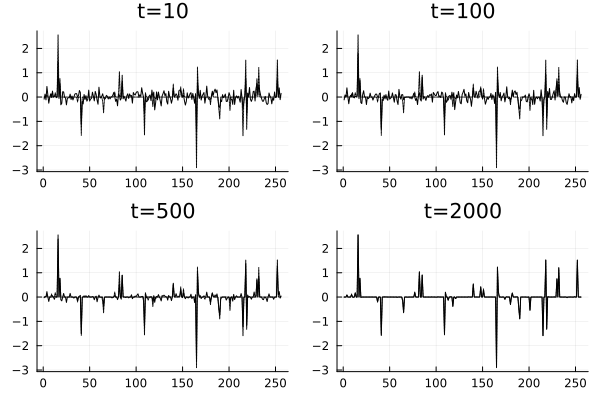

In [13]:
plot(p1,p2,p3,p4)

In [14]:
savefig("ISTA-demo-process.pdf")

"/Users/wadayama/Dropbox/DU-Book_test/Chapter_4/ISTA-demo-process.pdf"